## ----------------------------------------------------------------------------------------------------------------------------------

#### 10) Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers.

## ----------------------------------------------------------------------------------------------------------------------------------

### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import warnings
warnings.filterwarnings('ignore')

## ----------------------------------------------------------------------------------------------------------------------------------

### Loading The Dataset

In [5]:
df = load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.describe(include = 'object')

,species
count,150
unique,3
top,setosa
freq,50


In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [35]:
print("The features in the dataset are as follows : ")
print("1. Sepal length : ", df['sepal_length'].dtype)
print("2. Sepal width  : ", df['sepal_width'].dtype)
print("3. Petal length : ", df['petal_length'].dtype)
print("4. Petal width  : ", df['petal_width'].dtype)
print("5. Species      : ", df['species'].dtype)

The features in the dataset are as follows : 
1. Sepal length :  float64
2. Sepal width  :  float64
3. Petal length :  float64
4. Petal width  :  float64
5. Species      :  object


Text(0.5, 1.0, 'Petal Width')

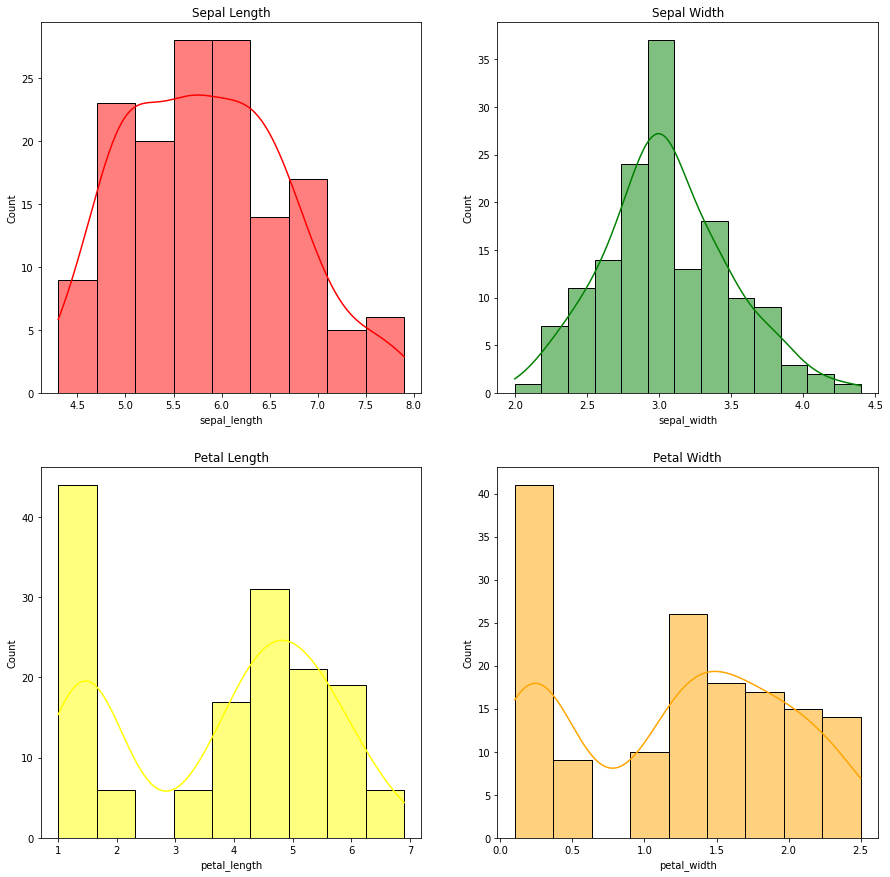

In [29]:
plt.figure(figsize=(15, 15))


plt.subplot(2, 2, 1)
sns.histplot(x = df['sepal_length'], kde=True, color= 'red')
plt.title('Sepal Length')


plt.subplot(2, 2, 2)
sns.histplot(x = df['sepal_width'], kde=True, color= 'green')
plt.title('Sepal Width')


plt.subplot(2, 2, 3)
sns.histplot(x = df['petal_length'], kde=True, color= 'yellow')
plt.title('Petal Length')


plt.subplot(2, 2, 4)
sns.histplot(x = df['petal_width'], kde=True, color= 'orange')
plt.title('Petal Width')

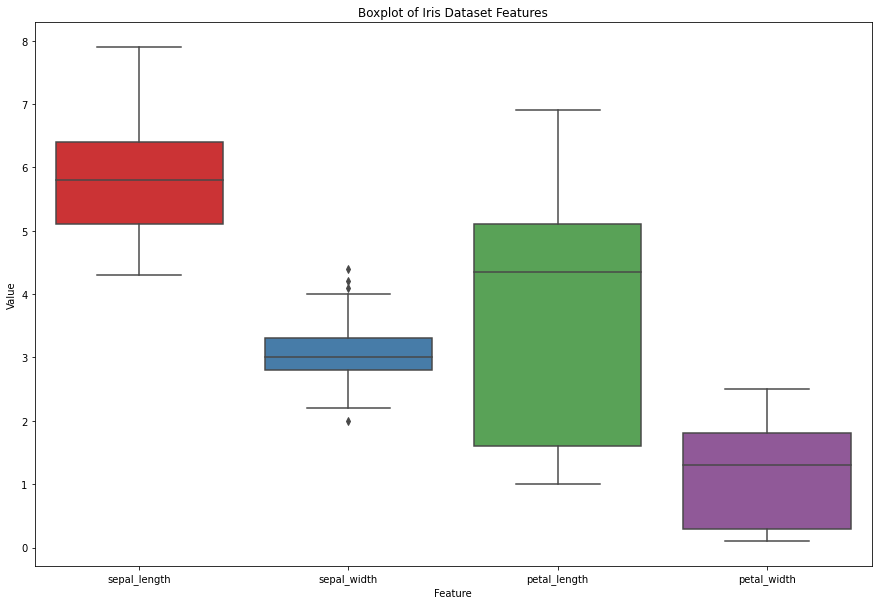

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="v", palette="Set1")
plt.title("Boxplot of Iris Dataset Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

Text(0.5, 1.0, 'Species wise Petal Width')

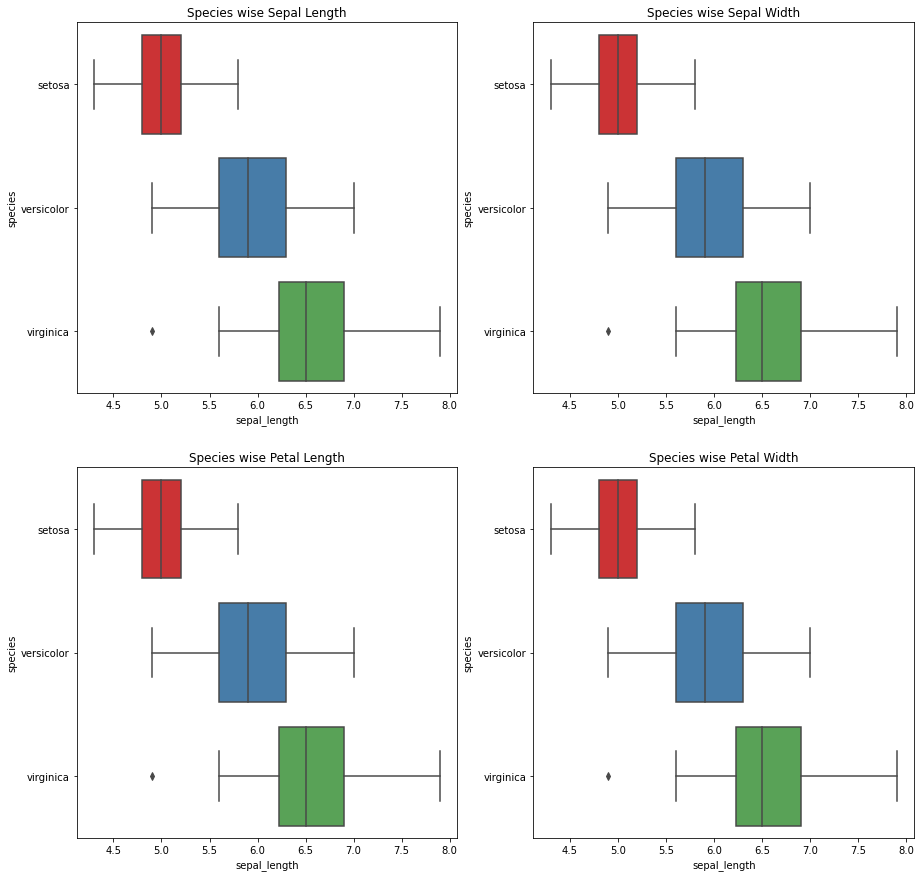

In [47]:
plt.figure(figsize=(15, 15))


plt.subplot(2, 2, 1)
sns.boxplot(x='sepal_length',y='species',data=df, palette = 'Set1')
plt.title('Species wise Sepal Length')


plt.subplot(2, 2, 2)
sns.boxplot(x='sepal_length',y='species',data=df, palette = 'Set1')
plt.title('Species wise Sepal Width')


plt.subplot(2, 2, 3)
sns.boxplot(x='sepal_length',y='species',data=df, palette = 'Set1')
plt.title('Species wise Petal Length')


plt.subplot(2, 2, 4)
sns.boxplot(x='sepal_length',y='species',data=df, palette = 'Set1')
plt.title('Species wise Petal Width')

In [51]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].count()

outliers_count = df.groupby('species').agg(lambda x: count_outliers(x.dropna()))

print("Count of outliers for each species w.r.t feature:")
outliers_count

Count of outliers for each species w.r.t feature:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0,2,4,2
versicolor,0,0,1,0
virginica,1,3,0,0
